# _Projet Informatique : déterminer l'exactitude de tweets répandant des rumeurs_

**Clémentine Abed-Meraim, Mathilde Binet - *1A ENSAE***

## Résumé :

&emsp; &emsp; Ces dernières années, les médias ont souvent été montrés du doigt à cause de leur possible influence dans les campagnes électorales, les décisions politiques, etc, notamment par le biais de publication de « Fake News ». La détection de ces « Fake News » est alors devenue un enjeu crucial pour garantir des informations précises et véridiques, notamment sur les réseaux sociaux – premier lieu de publication de Fake News. De nombreuses études tentent d’élaborer des modèles et de définir des critères afin de déterminer la véracité de certaines informations. 

&emsp; &emsp; Afin d’aborder ce problème de manière simplifiée, nous avons décidé de nous pencher sur une forme d’information à la fois concise et  riche en information : les tweets. Deux approches étaient envisageables pour évaluer la véracité d’un tweet sans entrer dans des méthodes trop complexes : le NLP (Natural Language Processing) ou l’apprentissage automatique par Machine Learning. Souhaitant avoir une première découverte du Machine Learning, nous avons donc naturellement choisi cette deuxième approche. Afin d’étudier l’apprentissage supervisé, nous avons procédé en deux temps : d’abord nous avons optimisé les features de notre base de données de tweets, ensuite nous avons considéré différents modèles de Machine Learning qui étaient adaptés à la problématique de classification entre « True News » et « Fake News ». 

&emsp; &emsp; Notre première difficulté a été de trouver une base de données de tweets contenant les features qui nous intéressaient (nombre de retweets, de favoris, etc). Nous en avons finalement trouvé une sur GitHub, mais qui était de taille restreinte (250 tweets). Les résultats de notre programme sont alors malheureusement peu significatifs et restent difficiles à évaluer. Toutefois, nous étions surtout intéressées par la démarche de recodage des features et par la préparation de la base de données. Cela nous a également permis de porter un regard critique sur notre programme. Dans un premier temps, nous nous sommes ainsi concentrées sur les features, dont l’optimisation et le recodage a déjà été une tâche conséquente. Par la suite, la compréhension de l’usage et de l’optimisation des paramètres des modèles de prédiction que nous avions choisi fût extrêmement fastidieux et a dépassé nos attentes initiales vis-à-vis du projet (c’est-à-dire une introduction aux méthodes de bases du Machine Learning). 

&emsp; &emsp; Cette première expérience d’implémentation d’un programme complet d’apprentissage supervisé a été extrêmement formatrice pour comprendre les enjeux du Machine Learning et expérimenter la manipulation de bases de données. Nous sommes en effet toutes deux très intéressées par ce champ de l’informatique, nous étions donc très motivées et pleines d'initiatives. Travailler ensemble nous a ainsi permit une aide mutuelle précieuse en partageant nos expériences et réflexions et en apportant un recul critique sur nos travaux. Nous avons pu chacune gagner grandement en autonomie et acquérir de nouvelles compétences en programmation. 

&emsp; &emsp; Finalement, après avoir réalisé une étude complète sur notre base de donnée, nous nous sommes heurtées à la difficulté d'exploiter les résultats de part le caractère très restreint de la base de test (50 tweets) pour comparer l'efficacité des prédictions des modèles. Nous avons alors décidé de comparer ces résultats et ceux d'une nouvelle base de données d'articles de Facebook, plus grande cette fois ci. Ces deux bases de données contenant des features comparables (nombres de partages, de réactions, respectivement retweets et favoris), il était intéressant de comparer les performances sur ces deux bases, tout en passant moins de temps à "préparer" la seconde base (concernant les features), puisque la démarche avait déja été réalisée pour la première.

&emsp; &emsp; Pour conclure, toutes ces étapes nous ont permis de compléter la réalisation d'un bout à l'autre d'un projet afin d'explorer les différents procédés liés au Machine Learning : de la recherche et visualisation de la base de données, à la sélection et création de features, au processing de ces données, ainsi qu'à la réalisation de plusieurs essais de modèles avec optimisation (élémentaire) des paramètrages et enfin à l'application et comparaison à une autre base similaire.
&emsp;



# Partie I : Préparation initiale au traitement

## I. Chargement et observation du dataset :

### I. 1. Chargement du dataset :

On le nomme df.

In [51]:
import pandas as pd 
import os 

In [52]:
df = pd.read_csv('Données/FinalDataSet.csv',encoding= 'unicode_escape')

### I. 2. Observation du dataset :

In [53]:
df

,Unique ID,text,created_at,retweet_count,favorite_count,source,length,user_id,user_screen_name,user_name,...,user_followers_count,user_friends_count,user_location,user_statuses_count,user_verified,user_url,statuses/followers_count,friends/followers_count,user_has_url?,Final Label
0,1,Hurricane Katrina - Saints go to the Superbowl...,03-11-2017 17:28,0,1,Twitter for iPhone,90,8.800000e+17,itsabinakelley,Erica Kane,...,299,410,made in japan,3585,False,NaN,11.990000,1.370000,No,REAL
1,2,Students from Riverview Elementary set a goal ...,03-11-2017 17:28,0,0,SocialNewsDesk,132,1.881336e+07,WAOW,WAOW,...,13095,768,"Wausau, Wisconsin",53691,True,http://t.co/Ooqm8p3JBi,4.100000,0.060000,Yes,REAL
2,3,Harvey caused more than $74M in damage to floo...,03-11-2017 16:37,0,0,Buffer,112,2.722783e+08,HOUmanitarian,HOUmanitarian,...,4261,3956,"Houston, Texas, U.S.A.",48019,False,https://t.co/xZ5kENca0d,11.270000,0.930000,Yes,REAL
3,4,I added a video to a @YouTube playlist https:/...,03-11-2017 17:27,0,0,Google,89,3.360066e+07,gdubb79,Gabriel Woofter,...,220,683,NaN,5649,False,https://t.co/tJVLcw98YK,25.680000,3.100000,Yes,REAL
4,5,DFW businesses accused of price gouging during...,03-11-2017 17:27,0,0,Twitter Web Client,97,1.844070e+07,TexasAmerica,TexasAmerica,...,1146,5000,Texas,69033,False,NaN,60.240000,4.360000,No,REAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Las Vegas shooting evidence everyone Missed ht...,16-10-2017 22:27,1,0,Twitter for iPhone,139,7.798742e+08,holguinrl33,Ralph Holguin,...,16,77,"Las Vegas, NV",34,False,NaN,2.125000,4.812500,No,FAKE
246,247,Rocky Palermo Las Vegas testimony\r\n\r\nâTh...,16-10-2017 22:12,0,0,Twitter Web Client,140,4.490722e+08,CaptDax,Dax Dushkewich,...,819,2290,"Tampa,FL",14388,False,http://t.co/Q3DKB37S4s,17.567766,2.796093,Yes,FAKE
247,248,"Campos, who is supposed to be part of this Las...",16-10-2017 22:07,0,0,Twitter for Android,139,3.579508e+08,mattyresch,Matthew Alexander,...,284,345,"Philadelphia, PA",9040,False,NaN,31.830986,1.214789,No,FAKE
248,249,Eyewitness to Las Vegas shooting claims multip...,16-10-2017 22:02,0,1,Twitter Lite,126,3.533779e+07,schindeler,R S,...,46,4,NaN,4745,False,NaN,103.152174,0.086957,No,FAKE


In [54]:
print(df.shape)

print(list(df.columns))

(250, 22)
['Unique ID', 'text', 'created_at', 'retweet_count', 'favorite_count', 'source', 'length', 'user_id', 'user_screen_name', 'user_name', 'user_created_at', 'user_description', 'user_followers_count', 'user_friends_count', 'user_location', 'user_statuses_count', 'user_verified', 'user_url', 'statuses/followers_count', 'friends/followers_count', 'user_has_url?', 'Final Label']


La base de données qu'on utilise contient 250 tweets. Chacun tweet est décrit selon 22 variables.

La dernière d'entre elles (**'Final Label'** ) caractérise la véracité du tweet concerné : elle indique s'il relate une "*Fake News*" ou une "*Real News*".


### I. 3. Types de ces variables :

In [55]:
df.dtypes

Unique ID                     int64
text                         object
created_at                   object
retweet_count                 int64
favorite_count                int64
source                       object
length                        int64
user_id                     float64
user_screen_name             object
user_name                    object
user_created_at              object
user_description             object
user_followers_count          int64
user_friends_count            int64
user_location                object
user_statuses_count           int64
user_verified                  bool
user_url                     object
statuses/followers_count    float64
friends/followers_count     float64
user_has_url?                object
Final Label                  object
dtype: object

Le module *scikit-learn* que nous allons utiliser par la suite n'accepte pas les features sous forme de chaîne de caractères (*object*).
Dans le premier temps de notre travail, nous allons ainsi recoder les features le permettant en variables numériques (*float64* ou *int64*) ou booléennes (*bool*).

## II. Recodage de certaines features

### II. 1. Recodage de Final Label :

Nous recodons la variable 'Final Label' indiquant la véracité du tweet en une variable booléenne, nommée '**accuracy**'.

In [56]:
df.rename(columns={'Final Label':'accuracy'}, inplace=True)

df.loc[df.accuracy == 'FAKE', 'accuracy'] = False
df.loc[df.accuracy == 'REAL', 'accuracy'] = True

In [57]:
df.dtypes['accuracy']

dtype('O')

Le type de la colonne 'accuracy' est *object*. Pandas ne gère donc pas cette variable comme on le souhaiterait (ie est comme un *booléen*). Nous allons donc convertir le type de la colonne.

In [58]:
df['accuracy'] = df['accuracy'].astype('bool')

In [59]:
df.dtypes['accuracy']

dtype('bool')

On voit qu'à présent, la colonne 'accuracy' a bien un type '*bool*'.

Avoir une variable de type booléen permet quand même à Python de faire des calculs dessus (moyenne par exemple). Pour cela, Python considérera que True = 1 et False = 0.

### II. 2. Recodage de la date de publication du tweet :

In [60]:
df['created_at']

0      03-11-2017 17:28
1      03-11-2017 17:28
2      03-11-2017 16:37
3      03-11-2017 17:27
4      03-11-2017 17:27
             ...       
245    16-10-2017 22:27
246    16-10-2017 22:12
247    16-10-2017 22:07
248    16-10-2017 22:02
249    16-10-2017 22:01
Name: created_at, Length: 250, dtype: object

La date de publication d'un tweet est sous un format qui nous permet de la recoder en variable numérique. Nous établirons ainsi que la date est le nombre de minutes séparant la publication d'un moment donné. 

Les tweets sont classés par date de publication décroissante. Ainsi les tweets ont été publiés entre le 16 octobre 2017 à 22h01 et le 3 novembre 2017 à 17h28. Le moment de référence pour le calcul de la date sera alors le *16 octobre 2017 à 22h01*, le moment de publication du premier tweet de la base. 

Bien sûr ce choix est tout à fait arbitraire, il s'agit ici seulement de recoder la date en un format numérique qui est "comparable" entre les différents tweets, et nous informe de leur chronologie. Par exemple, si le nombre de minutes spéarant le tweet de la date initiale est plus important que pour un second tweet, on sait que celui-ci a donc été posté plus tard, et on même peut calculer le temps de publication entre les deux. Ainsi cette variable relative permet d'obtenir des informations absolues (combien de temps séparent les publications).

Ce choix est de plus complétement dépendant de la base de données choisie ici, et ne peut s'appliquer à une autre.

In [61]:
from datetime import date

def decompte(created) : #Retourne le nombre de minutes entre le tweet et le premier tweet 
    
    #Décompte entre la publication du tweet et le 16 octobre 2017 à 00h00. 
    creat = str.split(created)
    jour = creat[0]
    heure = creat[-1]
    
    #on observe deux séparateurs dans la date : "-" ou "/"
    
    day1 = jour.split("-") # cas " - " : DD/MM/YYYY
    if len(day1) == 3 : 
        day, month, year = day1[0], day1[1], day1[2]
    if len(day1) == 1 :  #cas " / " : il y a une imprécision sur le format de la date 
        day1 = day1[0].split("/")
        
        if len(day1) != 3 : 
            return "Erreur sur la date" #une date est mal incodée : saisie manuelle 
        
        if day1[1] in ('10','11') : #DD/MM/YYYY
            day, month, year = day1[0], day1[1], day1[2]
        else :    #MM/DD/YYYY
            month, day, year = day1[0],day1[1],day1[2]
    hour, minute = heure.split(":")
    deltaday = date(int(year),int(month),int(day)) - date(2017,10,16)
    N = int(minute) + 60 * int(hour) + 24 * 60 * deltaday.days #Nombre de minutes séparant la publication du 16 octobre minuit.
    
    #Nombre de minutes séparant le premier tweet du 16 octobre minuit.
    Nbis = 22 * 60 + 1
    
    #Par comparaison entre les deux décomptes : 
    return N - Nbis 

datedebut = '16-10-2017 22:01'
datefin = '3/11/2017 17:28'
decompte(datedebut), decompte(datefin)

(0, 25647)

In [62]:
df['Date'] = [ decompte(str(created)) for created in df['created_at'] ]

df['Date']

0      25647
1      25647
2      25596
3      25646
4      25646
       ...  
245       26
246       11
247        6
248        1
249        0
Name: Date, Length: 250, dtype: object

On observe que des tweets sont mal encodés sur la date (retourne "Erreur sur la date"). On écrit une fonction retournant les tweets concernés. 

Il est en effet très important de *nettoyer* la base de données, en enlevant les lignes contenant des "Nan Values", puisque la plupart des algorithmes de Machine Learning ne peuvent fonctionner si il y a des attributs manquants.

In [63]:
def IndiceDate() : 
    BienEncode = []
    MalEncode = []
    for i in range(len(df)) : 
        if df['Date'][i] != "Erreur sur la date" : 
            BienEncode.append(i)
        else : 
            MalEncode.append(i)
    return BienEncode, MalEncode

IndiceDate()[1]

[212]

In [64]:
df['created_at'][212]

nan

Le tweet 212 est mal encodé sur la date ; elle n'est pas renseignée. A cause de l'absence de date de ce tweet, le type de la colonne 'Date' sera *'Object'* et non *'int64'*. D'où la manipulation suivante :
on enlève le tweet 212 et on convertit le type de la colonne.

In [66]:
df = df[pd.notnull(df['created_at'])]

df['Date'] = df['Date'].astype('int64')

df.dtypes['Date']

dtype('int64')

Le feature 'date' est alors bien numérique.

### II. 3. Codage d'une nouvelle feature : la durée séparant la création du compte de la publication du tweet 

Cette feature peut être intéressante et significative, notamment concernant la création de comptes Twitter "bot" dédiés à la propagation de "Fake News" et dont la durée séparant la création du compte de la publication du tweet est donc parfois très courte. A l'inverse une durée très longue séparant la création du compte de la publication du tweet pourrait signifier qu'il s'agit d'un compte Twitter plus fiable, car existant depuis longtemps. 

Evidemment, il ne s'agit que d'hypothèses résultant de nos réflexions, afin d'appuyer la possible pertinence de cette feature.

Codons la feature '*TimeSeparate*', contenant des informations combinées des features '*created_at*' et '*user_created_at*' :

In [67]:
def TimeSeparate(account,tweet) : #date de création du compte, date de post du tweet
        
    if decompte(account) == "Erreur sur la date" or decompte(tweet) == "Erreur sur la date" : 
        return "Erreur sur la date"
    
    return decompte(tweet) - decompte(account) 

In [68]:
def fctauxiliaire(i) : 
    if i == 212 :  #tweet mal encodé
        return 0
    account = df['user_created_at'][i] 
    tweet = df['created_at'][i]
    return TimeSeparate(str(account),str(tweet))

fctauxiliaire(1)

4636637

In [69]:
TS = [fctauxiliaire(i) for i in range(len(df))]

df['TimeSeparate'] = TS

df['TimeSeparate']

0       184011
1      4636637
2      3476824
3      4491329
4      4653504
        ...   
245    2695747
246    2705159
247    3051597
248    3241070
249    4458168
Name: TimeSeparate, Length: 249, dtype: int64

On vérifie enfin le type de la variable :

In [70]:
df['TimeSeparate'] = df['TimeSeparate'].astype('int64')
df.dtypes['TimeSeparate']

dtype('int64')

### II. 4. Dataset après recodage :

In [71]:
print(df.shape)
print(list(df.columns))


(249, 24)
['Unique ID', 'text', 'created_at', 'retweet_count', 'favorite_count', 'source', 'length', 'user_id', 'user_screen_name', 'user_name', 'user_created_at', 'user_description', 'user_followers_count', 'user_friends_count', 'user_location', 'user_statuses_count', 'user_verified', 'user_url', 'statuses/followers_count', 'friends/followers_count', 'user_has_url?', 'accuracy', 'Date', 'TimeSeparate']


## III. Préparation de la base de donnée 

### III. 1. Séparation en base d'apprentissage et base de test :


On sépare le dataset en deux : 20% servira de test, 80% de train. 

Le set de train servira donc à entraîner notre algorithme et le set de test à le tester après entraînement, afin d'observer sa précision.

In [72]:
import numpy as np
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=10, stratify = df['accuracy'])
print(len(train_set), "train +", len(test_set), "test")

199 train + 50 test


On travaille alors dans un premier temps avec la base d'apprentissage. 

### III. 2 Normalisation de la base de données :

A première vue, l'échelle des différentes features numériques est très différente. La normalisation est l'une des transformations les plus importantes à généralement appliquer aux données, car très souvent les algorithmes d'apprentissage automatique ne fonctionnent pas bien lorsque les attributs numériques ont des échelles très différentes.

On va donc mettre ces features numériques à la même échelle en les standardisant (on enlève la moyenne et on divise par la variance) mais seulement dans la base de train, sans toucher à la base de test.

In [73]:
df1 = train_set.copy()

# On sélectionne les features numériques seulement :
df1_num = df1[["retweet_count", "favorite_count", "length", "user_followers_count", 
           "user_friends_count", "user_statuses_count", "statuses/followers_count",
           "friends/followers_count", "Date", "TimeSeparate"]]

normalized_df1= (df1_num - df1_num.mean())/df1_num.std()

normalized_df1

,retweet_count,favorite_count,length,user_followers_count,user_friends_count,user_statuses_count,statuses/followers_count,friends/followers_count,Date,TimeSeparate
216,-0.348787,-0.028846,1.090879,-0.297475,-0.133008,-0.246554,0.231200,0.665272,-0.976755,-1.860592
140,-0.348787,-0.208235,1.090879,-0.281053,-0.161167,-0.343253,-0.295821,-0.045320,-0.971379,-1.669334
218,0.293885,-0.208235,-0.442798,0.143047,-0.237745,6.573275,0.306058,-0.405480,-0.976755,1.080492
172,-0.348787,-0.208235,0.114903,-0.241825,-0.143414,-0.335793,-0.377425,-0.214311,-0.973093,1.401370
152,-0.348787,-0.208235,-1.046973,-0.231425,-0.125846,-0.335479,-0.386629,-0.209182,-0.971768,-0.006011
...,...,...,...,...,...,...,...,...,...,...
116,-0.348787,-0.208235,-0.582223,-0.309994,-0.223727,-0.360363,2.582474,1.452525,1.029743,-0.428820
159,-0.348787,-0.208235,0.951454,-0.299343,-0.223972,-0.410976,-0.338156,-0.213369,-0.972158,-1.335758
173,-0.348787,-0.208235,1.090879,-0.255960,-0.170226,-0.269428,-0.300217,-0.231642,-0.973171,-0.034357
110,-0.348787,-0.208235,1.090879,-0.310775,-0.240072,-0.436337,-0.271287,-0.210869,1.031457,-1.347812


### III. 3. Sélection des features utiles :

In [74]:
print(list(train_set.columns))

['Unique ID', 'text', 'created_at', 'retweet_count', 'favorite_count', 'source', 'length', 'user_id', 'user_screen_name', 'user_name', 'user_created_at', 'user_description', 'user_followers_count', 'user_friends_count', 'user_location', 'user_statuses_count', 'user_verified', 'user_url', 'statuses/followers_count', 'friends/followers_count', 'user_has_url?', 'accuracy', 'Date', 'TimeSeparate']


Sélectionnons parmi les features celles susceptibles d'être les plus pertinentes. On concatène la base de features numériques normalisée et les features non numériques qui peuvent être utiles, à la fois pour la base de train et celle de test.

In [75]:
Train1 = df1[['user_verified','accuracy']]
Train2 = normalized_df1

Train = pd.concat([Train1, Train2], axis = 1)


Test = test_set.copy()
Test = Test[['user_verified','accuracy', "retweet_count", "favorite_count", 
            "length", "user_followers_count", "user_friends_count", "user_statuses_count", 
            "statuses/followers_count","friends/followers_count","Date","TimeSeparate"]]

Train

,user_verified,accuracy,retweet_count,favorite_count,length,user_followers_count,user_friends_count,user_statuses_count,statuses/followers_count,friends/followers_count,Date,TimeSeparate
216,False,False,-0.348787,-0.028846,1.090879,-0.297475,-0.133008,-0.246554,0.231200,0.665272,-0.976755,-1.860592
140,False,False,-0.348787,-0.208235,1.090879,-0.281053,-0.161167,-0.343253,-0.295821,-0.045320,-0.971379,-1.669334
218,False,True,0.293885,-0.208235,-0.442798,0.143047,-0.237745,6.573275,0.306058,-0.405480,-0.976755,1.080492
172,False,True,-0.348787,-0.208235,0.114903,-0.241825,-0.143414,-0.335793,-0.377425,-0.214311,-0.973093,1.401370
152,False,True,-0.348787,-0.208235,-1.046973,-0.231425,-0.125846,-0.335479,-0.386629,-0.209182,-0.971768,-0.006011
...,...,...,...,...,...,...,...,...,...,...,...,...
116,False,True,-0.348787,-0.208235,-0.582223,-0.309994,-0.223727,-0.360363,2.582474,1.452525,1.029743,-0.428820
159,False,True,-0.348787,-0.208235,0.951454,-0.299343,-0.223972,-0.410976,-0.338156,-0.213369,-0.972158,-1.335758
173,False,True,-0.348787,-0.208235,1.090879,-0.255960,-0.170226,-0.269428,-0.300217,-0.231642,-0.973171,-0.034357
110,False,True,-0.348787,-0.208235,1.090879,-0.310775,-0.240072,-0.436337,-0.271287,-0.210869,1.031457,-1.347812


### III. 4. Recodage des bases :

On transforme les bases de train et de test en les séparant chacune en deux parties : X et Y.

X correspond au dataset sans 'accuracy' et Y contient uniquement le label : 'accuracy'. En effet, c'est à partir des informations contenues dans X que l'on veut pouvoir prédire la valeur du label accuracy.

On reshape enfin Y en une ligne de 199 valeurs.

In [76]:
X_train = Train.drop(['accuracy'], axis = 1).to_numpy()
Y_train = Train[['accuracy']].to_numpy()

X_test = Test.drop(['accuracy'], axis = 1).to_numpy()
Y_test = Test[["accuracy"]].to_numpy()

Y_train = Y_train.reshape(Y_train.shape[0])
Y_test = Y_test.reshape(Y_test.shape[0])

## IV. Observation du dataset

Avant d'utiliser (dans la seconde partie) des méthodes de prédiction, nous allons mener une analyse descriptive en observant les données via des graphiques, afin de - peut-être - identifier des valeurs ou comportements propres à une catégorie de tweets (*True* ou *False*). 

La visualisation des données est essentielle pour mieux les comprendre et pour obtenir des informations sur les possibles influence sur la véracité des tweets. L'enjeu est d'explorer un peu plus en profondeur, en dépassant la simple compréhension générale de notre jeu de données.


### IV. 1. Observation des moyennes : 

La fonction groupby appliquée au critère *'accuracy'* nous permet de voir les moyennes des variables numériques normalisées et booléennes du dataset Train - respectivement pour les tweets *False* et les tweets *True*.

In [77]:
Train.groupby('accuracy').mean()

,user_verified,retweet_count,favorite_count,length,user_followers_count,user_friends_count,user_statuses_count,statuses/followers_count,friends/followers_count,Date,TimeSeparate
accuracy,,,,,,,,,,,
False,0.066667,0.002541,0.152934,0.189263,-0.006875,-0.055457,0.021346,-0.024043,-0.046276,-0.128034,-0.088784
True,0.104839,-0.001537,-0.092500,-0.114474,0.004158,0.033543,-0.012911,0.014542,0.027990,0.077440,0.053700


Certaines features ont des moyennes pour la catégorie *True* et la catégorie *False* éloignées. Cela peut laisser présupposer que les deux catégories ont des comportements relativement à ces variables différents, et donc qu'observer celui-ci permet d'estimer la véracité du tweet.

Par exemple, 
* La variable *'length'* a une moyenne de 0.189263 (resp. -0.114474) pour les tweets *False* (resp. *True*).
* La variable 'user verified' (à valeur dans {0,1}) a une moyenne de 0.066667 (resp. 0.104839) pour les tweets *False* (resp. *True*).

### IV. 2. Observation à une variable :

On peut alors observer comment se répartit la véracité du tweet selon sa longueur.

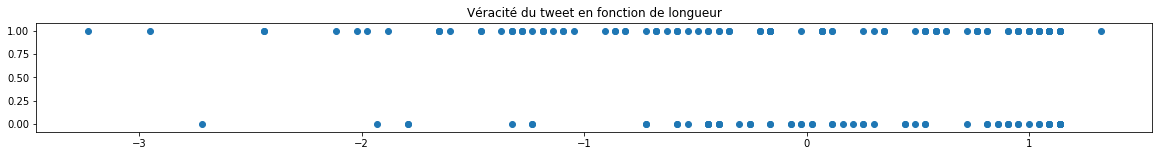

In [79]:
import matplotlib.pyplot as plt  

fig = plt.figure(1, figsize=(20,2))

plt.title('Véracité du tweet en fonction de longueur')
plt.scatter(Train['length'],Train['accuracy'])
plt.show()

Il n'est ainsi pas possible de mettre en avant un lien simple entre la longueur du tweet sa véracité. 

La variable '*user_verified*' est quant-à-elle booléenne, tout comme la variable '*accuracy*'. Nous allons ainsi effectuer un tri croisé avec ces deux variables.

In [80]:
#On affiche le pourcentage par ligne (feature 'user_verified') de tweets 'False' et 'True'

tableau = pd.crosstab(Train['user_verified'],Train['accuracy'])
tableau.astype('float').div(tableau.sum(axis=1), axis=0)

accuracy,False,True
user_verified,,
False,0.386740,0.613260
True,0.277778,0.722222


Ainsi, à titre d'exemple, 72% des tweets provenant du trainset dont l'auteur a été certifié relatent une *True News*. Néanmoins cela est à prendre avec des pincettes car le nombre de tweets *True* est bien supérieur à celui de tweets *False* (voir ci-dessous). Il est ainsi tout à fait normal que parmi les tweets vérifiant "*user_verified = True*" davantage soient *True* que *False*. Il faut ainsi comparer ces pourcentages à ceux de tweets de catégories *False* et *True*.

In [81]:
#Tri à plat de la variable 'accuracy'
Train["accuracy"].value_counts(normalize = True)

True     0.623116
False    0.376884
Name: accuracy, dtype: float64

62% des tweets de la base Train sont *True*. Ainsi les pourcentages obtenus lors du tri croisé ne sont pas révélateurs d'une quelconque tendance.

D'une manière générale, on observe qu'il est impossible de dégager un lien simple entre une feature seulement et la véractié du tweet. 

### IV. 3. Observation à deux variables :

Une étude d'une variable unique ne permet pas d'établir la véracité d'un tweet. Néanmoins, en conjuguant deux variables, peut-être pourrons nous mettre en avant des associations de variables permettant de déterminer *graphiquement* la véracité d'un tweet.

Nous donnons ici, *à titre d'exemple*, la représentation de la longueur du tweet selon la valeur de la variable TimeSeparate (mesurant la différence temporelle entre la création du compte Tweeter et la publication du tweet) pour les catégories *True* et *False*.

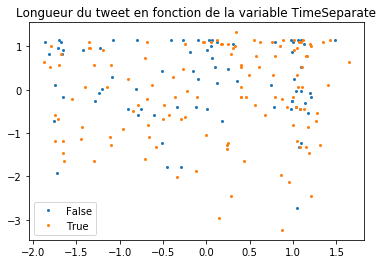

In [82]:
groups = Train.groupby('accuracy')

fig, ax = plt.subplots()

for veracite, group in groups:
    ax.plot(group['TimeSeparate'], group['length'], marker='o', linestyle='', ms=2, label=veracite)
ax.legend()
plt.title('Longueur du tweet en fonction de la variable TimeSeparate')
plt.show()

Cette étude graphique ne permet pas non plus de mettre en avant aucun combinement de deux variables permettant de préjauger de la véracité d'un tweet. 


**Qu'en tirer ?** 
Nous avons en fait ici essayé de mettre en avant un lien entre *une* feature et la véracité du tweet, puis entre *deux* features et la véracité. Jusqu'en dimension 2, nous pouvions utiliser une *approche graphique*. Néanmoins celle-ci est bien insuffisante pour notre problème. 

La suite de notre étude constitue en l'*augmentation du nombre de features pris en compte* afin de mettre en avant une articulation complexe entre les valeurs prises par ces dernières et la véracité du tweet. Nous utiliserons pour cela dans la partie 2 des modèles dédiés.

# Partie 2 : Prédiction de la véracité des tweets selon plusieurs modèles



Nous avons sélectionné trois modèles adapté à notre problème qui est celui d'une classification entre deux catégories (ainsi un modèle de Régression Linéaire serait par exemple absurde) :

- **SGDC Classifier**


- **Decision Tree Classifier**


- **Random Forest Regression**


## I. Modèle 1 : SGDC Classifier

On utilise un module de classification proposé par *skicitlearn* : la **Descente de Gradient Stochastique**. Il s'agit d'un modèle linéaire simple qui ne devrait pas permettre d'obtenir d'excellents résultats, cependant il ne risque pas d'overfitter.

### I. 1. Entraînement  :

In [83]:
from sklearn.metrics import mean_squared_error, classification_report

In [84]:
from sklearn.linear_model import SGDClassifier

sgd_twt = SGDClassifier(loss = 'log')
sgd_twt = sgd_twt.fit(X_train,Y_train)

predict_train_sgd = sgd_twt.predict(X_train)
predict_test_sgd = sgd_twt.predict(X_test)


### I. 2. Résultats sur la base train et la base set :

***Résultats sur la base train :***

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [86]:
print(confusion_matrix(Y_train, predict_train_sgd))
print('précision :', accuracy_score(Y_train, predict_train_sgd))
erreur = 1 - accuracy_score(Y_train, predict_train_sgd)
print('erreur :', erreur)

[[33 42]
 [40 84]]
précision : 0.5879396984924623
erreur : 0.4120603015075377


La **matrice de confusion** mesure la qualité d'un système de classification. Les lignes correspondent aux classes réelles (*True* ou *False*, données par la base Train), et les colonnes aux classes estimées par l'algorithme. Dans notre cas, la première ligne et la première colonne (respectivement deuxième) représentent la classe *False* (respectivement la classe *True*). Par exemple : la cellule ligne 2-colonne 2 contient le nombre de tweets *True* et reconnus comme tels par l'algorithme.

La *Précision* donne la proportion de tweets dont la classe a été reconnue par l'algorithme. Il s'agit des tweets figurant sur la diagonale de la matrice de confusion. 
L'*Erreur* indique quant-à-elle la proportion de tweets pour lesquels l'algorithme choisi s'est trompé de classe. Il s'agit donc de la proportion de tweets qui ne sont pas sur la diagonale de la matrice de confusion. Ces deux indicateurs sont liés par la relation $Précision + Erreur = 1 $.



***Résultats sur la base test :***

In [87]:
print(confusion_matrix(Y_test, predict_test_sgd))
print('précision :', accuracy_score(Y_test, predict_test_sgd))

erreur = 1 - accuracy_score(Y_test, predict_test_sgd)
print('erreur :', erreur)

print('prediction_test :', predict_test_sgd)

[[ 0 19]
 [ 0 31]]
précision : 0.62
erreur : 0.38
prediction_test : [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


On remarque que l'erreur sur la base de train et celle sur la base de test sont semblables. Le modèle n'a, comme prévu, pas overfitté. Néanmoins l'erreur est importante. 

Par lecture de la matrice de confusion, nous savons qu'il y a 19 "*Fake News*" et 31 "*True News*". Cependant la prédiction a retourné pour l'ensemble des tweets de *cette* base de Test le même résultat : *True*. 

En exécutant nos programmes à plusieurs reprises (avec des bases Train et Test différentes), nous avons remarqué que le modèle tend à toujours retourner un même résultat pour la *majorité* des tweets de la base Test. 
Cela concerne une *majorité* des tweets, et non forcèment la totalité : des exceptions peuvent subsister. En outre, le résultat majoritaire peut être aussi bien *True* que *False*, et dépend donc des bases considérées. La prédiction n'est donc pas d'assigner automatiquement le résultat *True*.


In [90]:
print('Base de train :')
print(classification_report(Y_train, predict_train_sgd))
print('Base de test :')
print(classification_report(Y_test, predict_test_sgd))

Base de train :
              precision    recall  f1-score   support

       False       0.45      0.44      0.45        75
        True       0.67      0.68      0.67       124

    accuracy                           0.59       199
   macro avg       0.56      0.56      0.56       199
weighted avg       0.59      0.59      0.59       199

Base de test :
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        19
        True       0.62      1.00      0.77        31

    accuracy                           0.62        50
   macro avg       0.31      0.50      0.38        50
weighted avg       0.38      0.62      0.47        50



Le *classification report* des résultats des bases de set et de train nous permet à nouveau d'observer les résultats du test. 

Bien que la prédiction n'assigne pas automatiquement le résultat *True* aux tweets de la base de Test, ce modèle tend à préférer un résultat et à l'assigner majoritairement.  **La prédiction du modèle est donc mauvaise.**

## II. Modèle 2 : Arbre de décision

Ce deuxième modèle - de **l'Arbre de décision** - est bien plus complexe que le premier. Il peut apporter de bien meilleurs résultats, à la condition qu'il n'overfit pas. 

### II. 1. Entraînement :

In [91]:
from sklearn.tree import DecisionTreeClassifier

tree_twt = DecisionTreeClassifier()
tree_twt = tree_twt.fit(X_train, Y_train)

predict_train_tree = tree_twt.predict(X_train)
predict_test_tree = tree_twt.predict(X_test)


### II. 2. Résultats pour les base de train et test :


***Résultats pour la base train :***

In [92]:
print(confusion_matrix(Y_train, predict_train_tree))
print('précision :', accuracy_score(Y_train, predict_train_tree))
erreur = 1 - accuracy_score(Y_train, predict_train_tree)
print('erreur :', erreur)

[[ 75   0]
 [  0 124]]
précision : 1.0
erreur : 0.0


***Résultats pour la base test :***

In [93]:
print(confusion_matrix(Y_test, predict_test_sgd))
print('précision :', accuracy_score(Y_test, predict_test_sgd))

erreur = 1 - accuracy_score(Y_test, predict_test_sgd)
print('erreur :', erreur)

print('prediction_test :', predict_test_sgd)

[[ 0 19]
 [ 0 31]]
précision : 0.62
erreur : 0.38
prediction_test : [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


L'erreur pour la base de Train est nulle, tandis que celle de la base de Test est bien plus grande. Le modèle a donc *overfitté*. On remarque de plus que la prédiction pour la base de Test est constituée majoritairement de *True*.

Nous allons donc chercher à optimiser les paramètres de l'arbre. 

### II. 3. Optimisation des paramètres :

***Optimisation***

On va utiliser la technique de *Cross Validation* pour faire varier différents paramètres du modèle, de manière a obtenir le modèle le plus performant possible.

On peut faire jouer avec les hyperparamètres non manuellement en utilisant GrikSearchCV car en lui donnant
les paramètres et les valeurs à essayer, il évaluera tous les combinaisons possibles jusqu'à trouver la meilleure. 

La compréhension de l'articulation et l'influence de tout les paramètres de ces différents modèles étant extrêmement fastidieuse, nous avons simplement décider de modifier certains paramètres usuels, sans trop rentrer dans les détails de cette optimisation.

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
parameters = {'max_depth':range(1,20), 'min_samples_leaf':range(1,40), 'min_samples_split':range(0,40)}
tree_twt = DecisionTreeClassifier()
tree_search_twt = GridSearchCV(tree_twt, parameters, cv=10, n_jobs=-1, verbose=1)
tree_search_twt.fit(X_train, Y_train)


Fitting 10 folds for each of 29640 candidates, totalling 296400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 8208 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 24208 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 46608 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 75408 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 110608 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 152208 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 200208 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 254608 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 296400 out of 296400 | elapsed:  4.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 20),
                         'm

In [96]:
tree_search_twt = tree_search_twt.best_estimator_
predict_train_tree_search  = tree_search_twt.predict(X_train)
predict_test_tree_search  = tree_search_twt.predict(X_test)

***Résultats pour la base train :***

In [97]:
print(confusion_matrix(Y_train, predict_train_tree_search))
print('précision :', accuracy_score(Y_train, predict_train_tree_search))
erreur = 1 - accuracy_score(Y_train, predict_train_tree_search)
print('erreur :', erreur)


[[ 37  38]
 [ 22 102]]
précision : 0.6984924623115578
erreur : 0.3015075376884422


***Résultats pour la base test :***

In [98]:
print(confusion_matrix(Y_test, predict_test_tree_search))
print('précision :', accuracy_score(Y_test, predict_test_tree_search))

erreur = 1 - accuracy_score(Y_test, predict_test_tree_search)
print('erreur :', erreur)

print('prediction_test :', predict_test_tree_search)

[[14  5]
 [22  9]]
précision : 0.46
erreur : 0.54
prediction_test : [False False False  True False False False False  True  True  True  True
 False False  True False False False False False False False False False
  True False False  True  True False  True False False False False False
 False  True  True False False False False False False False False  True
 False  True]


***Observation :***

Il n'y a plus de phénomène d'overfit. L'erreur sur la base de Train est maintenant non nulle. L'erreur sur la base de Test est néanmoins plus élevé que pour l'arbre précédent. Le modèle de prédiction donne cependant des résultats plus "variées" entre *True* et *False* pour la base de Test, ce qui rend les résultats meilleurs.

In [99]:
print('Base de train :')
print(classification_report(Y_train, predict_train_tree_search))
print('Base de test :')
print(classification_report(Y_test, predict_test_tree_search))


Base de train :
              precision    recall  f1-score   support

       False       0.63      0.49      0.55        75
        True       0.73      0.82      0.77       124

    accuracy                           0.70       199
   macro avg       0.68      0.66      0.66       199
weighted avg       0.69      0.70      0.69       199

Base de test :
              precision    recall  f1-score   support

       False       0.39      0.74      0.51        19
        True       0.64      0.29      0.40        31

    accuracy                           0.46        50
   macro avg       0.52      0.51      0.45        50
weighted avg       0.55      0.46      0.44        50



En comparaison avec le premier modèle (SCGD Classifier), **les résultats de l'arbre de décision sont meilleurs**. Pour la base de Train, l'erreur est plus faible. Et pour la base de Test, la prédiction est maintenant variée entre *True* et *False*.

## III. Modèle 3 : Random Forest

Ce troisième modèle - **Random Forest** - combine de nombreux arbres de décision. Cela le rend plus efficace qu'un arbre de décision seul.

### III. 1. Entraînement :

In [106]:
from sklearn.ensemble import RandomForestClassifier
rfc_twt = RandomForestClassifier()
rfc_twt = rfc_twt.fit(X_train, Y_train)
 
predict_train_rfc = rfc_twt.predict(X_train)
predict_test_rfc = rfc_twt.predict(X_test)


### III. 2. Résultats pour les bases de train et test :

***Résultats pour la base de train :***

In [107]:
print(confusion_matrix(Y_train, predict_train_rfc))
print('précision :', accuracy_score(Y_train, predict_train_rfc))
erreur = 1 - accuracy_score(Y_train, predict_train_rfc)
print('erreur :', erreur)

[[ 75   0]
 [  0 124]]
précision : 1.0
erreur : 0.0


***Résultats pour la base de test :***

In [108]:
print(confusion_matrix(Y_test, predict_test_rfc))
print('précision :', accuracy_score(Y_test, predict_test_rfc))

erreur = 1 - accuracy_score(Y_test, predict_test_rfc)
print('erreur :', erreur)

print('prediction_test :', predict_test_rfc)

[[14  5]
 [27  4]]
précision : 0.36
erreur : 0.64
prediction_test : [False  True False False False False False  True False False False False
 False False False  True False False False  True False False False False
 False False False False False False False  True False False  True False
  True False False False False False False False  True  True False False
 False False]


Comme pour le modèle précedent, le modèle a overfitté puisqu'on a une erreur nulle pour la base de train, et une erreur bien plus grande pour celle de test. De même les résultats de la prédiction semblent comme précédemment se répartir en majorité soit exclusivement dans la catégorie *False*, soit *True* selon les tentatives.

Il faut donc optimiser les paramètres de l'arbre.

### III. 3. Optimisation des paramètres :

In [109]:
parameters = {'max_depth':range(1,50), 'min_samples_leaf':range(1,50), 
              'max_features':["auto"], 'n_estimators':[20,30,40,50]}
rfc_twt = RandomForestClassifier()
rfc_search_twt = GridSearchCV(rfc_twt, parameters, cv=10, n_jobs=-1, verbose=1)
rfc_search_twt.fit(X_train, Y_train)
rfc_search_twt = rfc_search_twt.best_estimator_ 
rfc_search_twt

Fitting 10 folds for each of 9604 candidates, totalling 96040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 2476 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3576 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4876 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 6376 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 8076 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 9976 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 12076 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 14376 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 16876 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 19576 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 22476 tasks  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=19, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [112]:
predict_train_rfc_search_twt  = rfc_search_twt.predict(X_train)
predict_test_rfc_search_twt  = rfc_search_twt.predict(X_test)

***Résultats pour la base train :***

In [114]:
print(confusion_matrix(Y_train, predict_train_rfc_search_twt))
print('précision :', accuracy_score(Y_train, predict_train_rfc_search_twt))
erreur = 1 - accuracy_score(Y_train, predict_train_rfc_search_twt)
print('erreur :', erreur)

[[ 32  43]
 [  2 122]]
précision : 0.7738693467336684
erreur : 0.22613065326633164


***Résultats pour la base test :***

In [115]:
print(confusion_matrix(Y_test, predict_test_rfc_search_twt ))
print('précision :', accuracy_score(Y_test, predict_test_rfc_search_twt ))

erreur = 1 - accuracy_score(Y_test, predict_test_rfc_search_twt )
print('erreur :', erreur)

print('prediction_test :', predict_test_rfc_search_twt)

[[ 0 19]
 [ 0 31]]
précision : 0.62
erreur : 0.38
prediction_test : [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


In [116]:
print('Base de train :')
print(classification_report(Y_train, predict_train_rfc_search_twt))
print('Base de test :')
print(classification_report(Y_test, predict_test_rfc_search_twt ))

Base de train :
              precision    recall  f1-score   support

       False       0.94      0.43      0.59        75
        True       0.74      0.98      0.84       124

    accuracy                           0.77       199
   macro avg       0.84      0.71      0.72       199
weighted avg       0.82      0.77      0.75       199

Base de test :
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        19
        True       0.62      1.00      0.77        31

    accuracy                           0.62        50
   macro avg       0.31      0.50      0.38        50
weighted avg       0.38      0.62      0.47        50



/Users/clementineabed-meraim/anaconda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


On remarque que malgré l'optimisation des paramètres la prédiction pour la base de Test est constituée quasi systématiquement de *True*. Dans ce cas très précis, le modèle présentant les meilleurs résultats est donc le second modèle de l'arbre de décision. L'exploitation de ces modèles sur notre base de données n'offre malheureusement pas des résultats très significatifs, puisque nous n'avons pas obtenu de modèle permettant de donner une précision meilleure que celui attribuant automatiquement la valeur "*True*" à chaque tweet.

Cependant ce problème d'attribution des valeurs *True* est dû à la taille de notre base de données qui ne fournit pas assez de données avec des features significatives pour "entraîner" le modèle. Ainsi celui-ci n'arrive pas à prédire et à obtenir une précision meilleure que s'il attribue automatiquement des *True*, puisqu'il y a une majorité de *True* dans la base de données (62% i.e exactement la précision obtenue).


Il peut donc être intéressant de comparer l'usage de ces modèles sur une base de données similaire et plus grande.
Il est extrêmement difficile de trouver des bases de données importantes de tweets autres que pour du NLP, et donc contenant les informations qui nous intéressent (nombre de retweets, etc.)

Ainsi nous nous sommes tournés vers une seconde base, plus grande (2282 posts), cette fois-ci issue d'un second réseau social. Il s'agit d'articles ayant été relayés sur Facebook.


# Partie 3 : Prédiction de la véracité d'articles relayés sur Facebook avec les mêmes modèles et comparaison avec notre première base

## I. Préparation initiale au traitement 

### I. 1. Chargement et observation du dataset :

On commence par charger le dataset :

In [264]:
df = pd.read_csv("Données/facebook-fact-check.csv")
df.head()

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
0,184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,NaN,NaN,146.0,15.0
1,184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,1.0,33.0,34.0
2,184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,34.0,63.0,27.0
3,184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,35.0,170.0,86.0
4,184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,568.0,3188.0,2815.0


Les features de cette base de données sont comparable à la première car le nombre de retweet, de favoris peuvent être comparés au nombre de partages, de réactions, de commentaires. Nous avons aussi la source et la date.

Les bases diffèrent cependant par certaines informations apportées uniquement par la première (nombre de followers, date de création du compte...) et d'autres par la seconde (catégorie au sens de parti pris politique, type de post...)

***Visualisation élémentaire de la base de données***


La spécificité de ce dataset et qu'il ne distingue pas de façon binaire la véracité d'un post : il crée une forme
de classification, ou échelle de véracité ('mostly true','no factual content' etc.). 

Il peut être intéressant de recoder cette échelle numériquement et de regarder la répartition de la précision des informations en fonction de certaines features.

In [265]:
df1 = df.copy()

df1.loc[df1.Rating == 'no factual content', 'Rating'] = 0.2
df1.loc[df1.Rating == 'mixture of true and false', 'Rating'] = 0.5
df1.loc[df1.Rating == 'mostly true', 'Rating'] = 1
df1.loc[df1.Rating == 'mostly false', 'Rating'] = 0

On peut par exemple dans un premier temps regarder comment se répartissent les articles selon leur nombre de partages et de réactions.

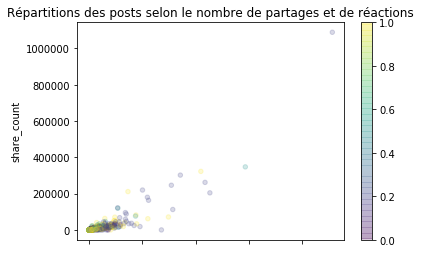

In [266]:
import matplotlib.pyplot as plt 
df1['Rating']

df1.plot.scatter(x="reaction_count", y="share_count", alpha=0.2, c = df1.Rating, colormap='viridis', colorbar=True)


plt.title("Répartitions des posts selon le nombre de partages et de réactions")
plt.show()

Comme précédemment, avec notre base de données de tweets, cette étude graphique ne permet de mettre en avant aucun motif spécifique caractéristique de la véracité d'un propos à partir de deux variables seulement. 

Comprendre l'articulation complexe entre les valeurs prises par ces dernières et la véracité d'un article nécessite donc a nouveau l'utilisation de modèles bien plus élaborés. 

### I. 2. Recodage de certaines features :

***Features non numériques***

Plus tôt, nous n'avions pas conservé d'attribut de texte  dans notre base de données de tweets finale.
Les features contenant du texte ne peuvent pas être gardées intactes, il convient de convertir ces attributs de texte en nombres.
Scikit-Learn fournit un transformateur qui créera un attribut binaire par catégorie. Ici par exemple pour l'attribut 
'Category', cela renverra une matrice dont le nombre de colonnes est égal au nombre de catégories, et qui contient un 1 dans la colonne "vidéo" si il s'agit d'une vidéo, et des 0 partout ailleurs (et pareil si il s'agit d'un lien ou d'une photo).

In [267]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
df['Category'] = encoder.fit_transform(df['Category'])


df['Post Type'] = encoder.fit_transform(df['Post Type'])


df['Page'] = encoder.fit_transform(df['Page'])




On recode ensuite la variable 'Debate' en remplaçant les Nan Values par des 0.

In [268]:
df.loc[df.Debate != 'yes', 'Debate'] = 0
df.loc[df.Debate == 'yes', 'Debate'] = 1

***Variables manquantes***

On efface enfin toutes les lignes contenant encore des Nan values.

In [269]:
df = df.dropna()
print(df.isnull().sum().sum()) #on vérifie qu'on a bien enlevé toutes les lignes avec des Nan Values

0


***Séparation en base d'apprentissage et base de test :***

On sépare la base en 20% de base test et 80% de train.

In [270]:
import numpy as np
from sklearn.model_selection import train_test_split


train_set, test_set = train_test_split(df, test_size=0.2, random_state=10, stratify = df['Rating'])
print(len(train_set), "train +", len(test_set), "test")

1769 train + 443 test


On ne travaille désormais que sur la base de train.

***Normalisation des features numériques***

In [271]:
df2 = train_set.copy()

# On sélectionne les features numériques seulement :
df2_num = df2[["share_count", "reaction_count", "comment_count"]]

normalized_df2= (df2_num - df2_num.mean())/df2_num.std()

normalized_df2


,share_count,reaction_count,comment_count
1037,-0.189346,-0.304167,-0.333039
757,-0.192398,-0.313992,-0.336686
1909,-0.070585,-0.095277,0.261483
1071,-0.021808,-0.106739,0.713757
1478,-0.192088,-0.309489,-0.306778
...,...,...,...
524,-0.160690,-0.105160,-0.202463
568,-0.191726,-0.309548,-0.303860
1131,-0.120448,-0.070248,-0.278329
1869,-0.188053,-0.243348,-0.203193


### I. 3. Préparation de la base de donnée 

In [333]:
Train1 = train_set[['Category', 'Post Type', 'Rating', 'Debate', 'Page']]
Train2 = normalized_df2

Train = pd.concat([Train1, Train2], axis = 1)

Test = test_set.copy()
Test = Test[['Category', 'Post Type', 'Rating', 'Debate', 'Page', 'share_count', 'reaction_count', 'comment_count']]


Train = Train.dropna()
print(Train.isnull().sum().sum()) # on vérifie qu'on a bien enlever toutes les lignes avec des Nan Values

Train

0


,Category,Post Type,Rating,Debate,Page,share_count,reaction_count,comment_count
1037,0,1,mostly true,0,0,-0.189346,-0.304167,-0.333039
757,0,1,no factual content,0,0,-0.192398,-0.313992,-0.336686
1909,0,1,mixture of true and false,0,0,-0.070585,-0.095277,0.261483
1071,0,1,mostly true,0,0,-0.021808,-0.106739,0.713757
1478,0,1,mostly true,0,0,-0.192088,-0.309489,-0.306778
...,...,...,...,...,...,...,...,...
524,0,1,mostly true,0,0,-0.160690,-0.105160,-0.202463
568,0,1,mostly true,0,0,-0.191726,-0.309548,-0.303860
1131,0,1,mostly true,1,0,-0.120448,-0.070248,-0.278329
1869,0,1,mostly true,0,0,-0.188053,-0.243348,-0.203193


In [334]:
X_train = Train.drop(['Rating'], axis = 1).to_numpy()
Y_train = Train[['Rating']].to_numpy()


X_test = Test.drop(['Rating'], axis = 1).to_numpy()
Y_test = Test[["Rating"]].to_numpy()


Y_test = Y_test.reshape(Y_test.shape[0])

Y_train = Y_train.reshape(Y_train.shape[0])


## II. Implémentation des modèles

### II. 1.  SGDC Classifier

In [335]:
from sklearn.linear_model import SGDClassifier

sgd_twt = SGDClassifier(loss = 'log')
sgd_twt = sgd_twt.fit(X_train,Y_train)

predict_train_sgd = sgd_twt.predict(X_train)
predict_test_sgd = sgd_twt.predict(X_test)

***Résultats pour la base train :***

In [336]:
print(confusion_matrix(Y_train, predict_train_sgd))
print('précision :', accuracy_score(Y_train, predict_train_sgd))
erreur = 1 - accuracy_score(Y_train, predict_train_sgd)
print('erreur :', erreur)

[[   4    0  184    5]
 [   0    0   75    7]
 [   6    0 1260   40]
 [   0    0  119   69]]
précision : 0.7535330695308083
erreur : 0.24646693046919166


***Résultats pour la base test :***

In [373]:
print(confusion_matrix(Y_test, predict_test_sgd))
print('précision :', accuracy_score(Y_test, predict_test_sgd))

erreur = 1 - accuracy_score(Y_test, predict_test_sgd)
print('erreur :', erreur)


[[  1   0   1  46]
 [  0   0   1  20]
 [ 35  58   3 231]
 [  3   2   0  42]]
précision : 0.1038374717832957
erreur : 0.8961625282167043


In [318]:
np.set_printoptions(threshold=np.inf)
print('prediction_test :', predict_test_sgd )

prediction_test : ['mostly true' 'mostly true' 'mostly true' 'mostly true' 'mostly true'
 'mostly true' 'mostly true' 'mostly true' 'mostly true' 'mostly true'
 'mostly true' 'mostly true' 'mostly true' 'mostly true' 'mostly true'
 'mostly true' 'mostly false' 'mostly true' 'mostly true' 'mostly true'
 'mostly true' 'mostly true' 'mostly true' 'mostly true' 'mostly true'
 'mostly true' 'mostly true' 'mostly true' 'mostly true' 'mostly true'
 'mostly true' 'mostly true' 'mostly true' 'mostly true' 'mostly true'
 'mostly true' 'mostly true' 'mostly true' 'mostly true' 'mostly true'
 'mostly true' 'mostly true' 'mostly true' 'mostly true' 'mostly true'
 'mostly false' 'mostly true' 'mostly true' 'mostly true' 'mostly true'
 'mostly true' 'mostly true' 'mostly true' 'mostly true' 'mostly true'
 'mostly true' 'mostly true' 'mostly true' 'mostly true' 'mostly false'
 'mostly true' 'mostly true' 'mostly true' 'no factual content'
 'mostly true' 'mostly true' 'mostly true' 'mostly true' 'mostl

On affiche la prédiction pour la base de test afin de vérifier à première vue que le modèle prédit des réponses *variées*, et non systématiquement la même.
Les résultats pour la base de train sont meilleurs que pour la base de données précédente (20% meilleure environ).

Il faut cependant prendre en compte que cette base de données contient en grande majorité (73%) des articles étiquettés "mostly true". Ainsi pour que le modèle soit réellement efficace, c'est-à-dire plus efficace que de systèmatiquement étiquetter "mostly true" pour chaque article, il faut que la précision soit supérieure à 73%. C'est bien la cas ici, même si d'assez peu : les résultats sont plutôt performants.

De plus les résultats de la base de test sont très mauvais : le modèle ne semble pas performant.

In [338]:
print(classification_report(Y_train, predict_train_sgd))
print(classification_report(Y_test, predict_test_sgd))

                           precision    recall  f1-score   support

mixture of true and false       0.40      0.02      0.04       193
             mostly false       0.00      0.00      0.00        82
              mostly true       0.77      0.96      0.86      1306
       no factual content       0.57      0.37      0.45       188

                 accuracy                           0.75      1769
                macro avg       0.43      0.34      0.34      1769
             weighted avg       0.67      0.75      0.68      1769

                           precision    recall  f1-score   support

mixture of true and false       0.03      0.02      0.02        48
             mostly false       0.00      0.00      0.00        21
              mostly true       0.60      0.01      0.02       327
       no factual content       0.12      0.89      0.22        47

                 accuracy                           0.10       443
                macro avg       0.19      0.23      0.06 

/Users/clementineabed-meraim/anaconda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


On remarque également que les prédictions du modèle bien qu'elles ne soient pas sytématiquement toujours la même catégorie, tendent à se répartir dans les 2 catégories les plus importantes de la base de données ('mostly true' et 'no factual content'), et peu dans les autres, surtout *mostly false* qui n'est même pas attribué.

Cependant lorsque l'algorithme attribue ces 2 catégories les plus importantes, sa précision est plutôt bonne pour la base train, et moins pour celle de test mais reste meilleure que pour l'attribution des autres catégories.

Il est aussi intéressant de remarquer que pour la base de train, l'algorithme est capable de trouver 96% des "mostly true", mais pour la base de test, seulement 1%. Les performances de prédiction varient donc assez entre test et train.

### II. 2. Arbre de décision

In [339]:
tree_twt = DecisionTreeClassifier()
tree_twt = tree_twt.fit(X_train, Y_train)

predict_train_tree = tree_twt.predict(X_train)
predict_test_tree = tree_twt.predict(X_test)

***Résultats pour la base train :***

In [342]:
print(confusion_matrix(Y_train, predict_train_tree))
print('précision :', accuracy_score(Y_train, predict_train_tree))
erreur = 1 - accuracy_score(Y_train, predict_train_tree)
print('erreur :', erreur)

[[ 193    0    0    0]
 [   0   82    0    0]
 [   0    0 1306    0]
 [   0    0    0  188]]
précision : 1.0
erreur : 0.0


***Résultats pour la base test :***

In [343]:
print(confusion_matrix(Y_test, predict_test_sgd))
print('précision :', accuracy_score(Y_test, predict_test_sgd))

erreur = 1 - accuracy_score(Y_test, predict_test_sgd)
print('erreur :', erreur)


#print('prediction_test :', predict_test_sgd)

[[  1   0   1  46]
 [  0   0   1  20]
 [ 35  58   3 231]
 [  3   2   0  42]]
précision : 0.1038374717832957
erreur : 0.8961625282167043


Le modèle overfit ici puisque l'erreur est nulle pour la base de train et bien plus grande, voire immense, pour celle de test.
Il convient d'optimiser nos paramètres.

***Optimisation***

In [355]:
parameters = {'max_depth':range(0,40), 'min_samples_leaf':range(0,40), 'min_samples_split':range(0,40)}
tree_twt = DecisionTreeClassifier()
tree_search_twt = GridSearchCV(tree_twt, parameters, cv=10, n_jobs=-1, verbose=1)
tree_search_twt.fit(X_train, Y_train)

Fitting 10 folds for each of 64000 candidates, totalling 640000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 4368 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 12368 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 23568 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 37968 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 55568 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 76368 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 100368 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 127568 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 157968 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 191568 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 228368 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 268368 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 311568 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: D

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(0, 40),
                         'm

In [360]:
predict_train_tree_search  = tree_search_twt.predict(X_train)
predict_test_tree_search  = tree_search_twt.predict(X_test)

***Résultats pour la base train :***

In [361]:
print(confusion_matrix(Y_train, predict_train_tree_search))
print('précision :', accuracy_score(Y_train, predict_train_tree_search))
erreur = 1 - accuracy_score(Y_train, predict_train_tree_search)
print('erreur :', erreur)

[[  10    4  169   10]
 [   0    6   68    8]
 [   2    3 1246   55]
 [   1    2   80  105]]
précision : 0.7727529677784059
erreur : 0.22724703222159415


***Résultats pour la base test :***

In [362]:
print(confusion_matrix(Y_test, predict_test_tree_search))
print('précision :', accuracy_score(Y_test, predict_test_tree_search))

erreur = 1 - accuracy_score(Y_test, predict_test_tree_search)
print('erreur :', erreur)



[[  0   0  46   2]
 [  0   0  20   1]
 [  0   0 279  48]
 [  0   0  17  30]]
précision : 0.6975169300225733
erreur : 0.3024830699774267


La précision est bien meilleure que pour le premier modèle, et les résultats de la prédiction semblent plutôt encourageants.
Même si on remarque que cette prédiction est moins précise que si on attribuait automatiquement *mostly true*, la précision reste assez proche de ces 73%.


In [354]:
print(classification_report(Y_train, predict_train_tree_search))
print(classification_report(Y_test, predict_test_tree_search))

                           precision    recall  f1-score   support

mixture of true and false       0.77      0.05      0.10       193
             mostly false       0.40      0.07      0.12        82
              mostly true       0.80      0.95      0.87      1306
       no factual content       0.59      0.56      0.57       188

                 accuracy                           0.77      1769
                macro avg       0.64      0.41      0.42      1769
             weighted avg       0.75      0.77      0.72      1769

                           precision    recall  f1-score   support

mixture of true and false       0.00      0.00      0.00        48
             mostly false       0.00      0.00      0.00        21
              mostly true       0.77      0.85      0.81       327
       no factual content       0.37      0.64      0.47        47

                 accuracy                           0.70       443
                macro avg       0.29      0.37      0.32 

/Users/clementineabed-meraim/anaconda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


La prédiction du modèle associant les articles sur cette "échelle" de véracité semble assez bonne pour les 2 catégories *mostly true* et *no factual content* : 
Lorsque l'algorithme attribue des catégories à des articles, sa précision plutôt performante et globalement meilleure que pour le modèle performante.

Cependant sa capacité à attribuer *mixture of true and false* et *mostly false* est moindre (ils ne sont mêmes pas attribué dans la base de test).

De plus les résultats sur la base de train et de set semblent assez similaire, contrairement au modèle précédent, il est plus cohérent.

### II. 3. Random Forest

In [363]:
from sklearn.ensemble import RandomForestClassifier
rfc_twt = RandomForestClassifier()
rfc_twt = rfc_twt.fit(X_train, Y_train)
 
predict_train_rfc = rfc_twt.predict(X_train)
predict_test_rfc = rfc_twt.predict(X_test)

***Résultats pour la base train :***

In [364]:
print(confusion_matrix(Y_train, predict_train_rfc))
print('précision :', accuracy_score(Y_train, predict_train_rfc))
erreur = 1 - accuracy_score(Y_train, predict_train_rfc)
print('erreur :', erreur)

[[ 193    0    0    0]
 [   0   82    0    0]
 [   0    0 1306    0]
 [   0    0    0  188]]
précision : 1.0
erreur : 0.0


***Résultats pour la base test :***

In [365]:
print(confusion_matrix(Y_test, predict_test_rfc))
print('précision :', accuracy_score(Y_test, predict_test_rfc))

erreur = 1 - accuracy_score(Y_test, predict_test_rfc)
print('erreur :', erreur)

#print('prediction_test :', predict_test_rfc)

[[ 36   0   0  12]
 [ 18   0   0   3]
 [242   7  26  52]
 [ 28   1   4  14]]
précision : 0.17155756207674944
erreur : 0.8284424379232506


Le modèle overfit, comme on pouvait le prédire. On optimise donc les paramètres.

***Optimisation***

In [367]:
parameters = {'max_depth':range(1,40), 'min_samples_leaf':range(1,40), 
              'max_features':["auto"], 'n_estimators':[20,30,40,50]}
rfc_twt = RandomForestClassifier()
rfc_search_twt = GridSearchCV(rfc_twt, parameters, cv=10, n_jobs=-1, verbose=1)
rfc_search_twt.fit(X_train, Y_train)
rfc_search_twt = rfc_search_twt.best_estimator_ 
rfc_search_twt

Fitting 10 folds for each of 6084 candidates, totalling 60840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [368]:
predict_train_rfc_search_twt  = rfc_search_twt.predict(X_train)
predict_test_rfc_search_twt  = rfc_search_twt.predict(X_test)

***Résultats pour la base train :***

In [369]:
print(confusion_matrix(Y_train, predict_train_rfc_search_twt))
print('précision :', accuracy_score(Y_train, predict_train_rfc_search_twt))
erreur = 1 - accuracy_score(Y_train, predict_train_rfc_search_twt)
print('erreur :', erreur)

[[  31    0  154    8]
 [  10    1   65    6]
 [   1    0 1279   26]
 [   4    0   81  103]]
précision : 0.7993216506500848
erreur : 0.20067834934991524


***Résultats pour la base test :***

In [370]:
print(confusion_matrix(Y_test, predict_test_rfc_search_twt))
print('précision :', accuracy_score(Y_test, predict_test_rfc_search_twt))

erreur = 1 - accuracy_score(Y_test, predict_test_rfc_search_twt)
print('erreur :', erreur)

print('prediction_test :', predict_test_rfc)

[[  0   0  46   2]
 [  0   0  20   1]
 [  0   0 300  27]
 [  0   0  17  30]]
précision : 0.744920993227991
erreur : 0.255079006772009
prediction_test : ['no factual content' 'mixture of true and false' 'no factual content'
 'no factual content' 'no factual content' 'mixture of true and false'
 'mixture of true and false' 'mixture of true and false'
 'mixture of true and false' 'no factual content'
 'mixture of true and false' 'mixture of true and false'
 'mixture of true and false' 'mixture of true and false'
 'mixture of true and false' 'mostly false' 'mixture of true and false'
 'mixture of true and false' 'no factual content'
 'mixture of true and false' 'no factual content'
 'mixture of true and false' 'mixture of true and false'
 'mixture of true and false' 'mixture of true and false'
 'mixture of true and false' 'no factual content'
 'mixture of true and false' 'no factual content'
 'mixture of true and false' 'mixture of true and false'
 'no factual content' 'no factual content'

On peut remarquer que les résultats de ce modèle ressemblent beaucoup à celui du modèle précedent, en plus performant.
Ses performances sont semblables au premier modèle, bien que comme précédemment qu'il ne semble toujours pas prédire les valeurs de *mixture of true and false* et *mostly false* dans la base de test.

In [372]:
print(classification_report(Y_train, predict_train_rfc_search_twt))
print(classification_report(Y_test, predict_test_rfc_search_twt))

                           precision    recall  f1-score   support

mixture of true and false       0.67      0.16      0.26       193
             mostly false       1.00      0.01      0.02        82
              mostly true       0.81      0.98      0.89      1306
       no factual content       0.72      0.55      0.62       188

                 accuracy                           0.80      1769
                macro avg       0.80      0.43      0.45      1769
             weighted avg       0.79      0.80      0.75      1769

                           precision    recall  f1-score   support

mixture of true and false       0.00      0.00      0.00        48
             mostly false       0.00      0.00      0.00        21
              mostly true       0.78      0.92      0.85       327
       no factual content       0.50      0.64      0.56        47

                 accuracy                           0.74       443
                macro avg       0.32      0.39      0.35 

On remarque que la précision est encore meilleure en tout point pour la prédiction des catégories *mostly true* et     *no factual content*. Cependant le problème de l'attribution des autres catégories reste le même.

Ce modèle est bien sûr le plus performant, ceci étant prévisible puisque c'est le plus élaboré.

Dans ce cas précis où la base de données contient une "échelle" de véracité, il aurait été pertinant de considérer des modèles de régression linéaire, qui auraient pu offrir des résultats performants. 
Cependant ici le but était de tester et comparer notre démarche sur une nouvelle base de données, donc nous avons considéré les mêmes modèles.

# Conclusion :

Malgré les limites posées par les bases de données que nous avions à disposition (nous avons en effet passé un certain de temps à rechercher des bases de données adaptées), les différentes étapes que nous avons implémenté nous ont permis de réaliser en autonomie un projet complet de Machine Learning : de la manipulation d'une base de données à l'exploitation de différents modèles. 

Le but de notre projet n'est évidemment pas d'offir une perspective novatrice et performante sur ces modèles, mais simplement de comprendre les enjeux de l'apprentissage automatique sur un modèle simple, posant une problématique intéressante et actuelle, et accessible à un étudiant de 1A découvrant ces notions.

La compréhension profonde de chacune de nos démarches et une prise de recul critique nous a permis d'avancer, d'exploiter nos résultats et de motiver chacun de nos choix (par exemple celui de réaliser une démarche similaire pour une base de données plus grande). Nous avons également découvert et appris à utiliser de nombreux outils (matrice de confusion, classification report, etc).

Finalement, certains de nos résultats sont encourageants et montrent la pertinence de notre approche, même si celle-ci reste encore bien perfectible, et que le NLP est souvent bien plus efficace.

